In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
FIGSIZE = (10, 10)

In [3]:
class Oscillator:
    def __init__(self, xdim, ydim, x, y, amp=1, freq=1):
        self.xdim = xdim
        self.ydim = ydim
        self.grid = np.zeros([xdim, ydim])
        self.x = x
        self.y = y
        self._amp = amp
        self._freq = freq
            
    @property
    def amp(self):
        return self._amp
    
    @amp.setter
    def amp(self, val):
        self._amp = val
    
    @property
    def freq(self):
        return self._freq
    
    @freq.setter
    def freq(self, val):
        self._freq = val
    
    def plot(self, t=0):
        plt.figure(figsize=FIGSIZE)
        self.get_grid(t)
        plt.axis('off')
        plt.imshow(self.grid)
        
    def get_grid(self, t=0):
        for x in range(self.xdim):
            for y in range(self.ydim):
                self.grid[x, y] = self._get_sine(x, y, t)
        return self.grid

    def _get_sine(self, x, y, t):
        return (
            self.amp*np.sin(
                2*np.pi*self.freq*np.sqrt(
                    (x - self.x)**2 + (y - self.y)**2 + t)))

In [4]:
class World:
    def __init__(self, xdim, ydim, t):
        self.xdim = xdim
        self.ydim = ydim
        self.t = t
        self.oscillators = []
        
    def add_oscillator(self, x, y, **kwargs):
        osc = Oscillator(self.xdim, self.ydim, x, y, **kwargs)
        self.oscillators.append(osc)
        
    def get_grid(self):
        assert len(self.oscillators), 'Must add at least one oscillator'
        grid = self.oscillators[0].get_grid(self.t)
        if len(self.oscillators) > 1:
            for o in self.oscillators[1:]:
                grid += o.get_grid(self.t)
        return grid
    
    def plot(self):
        plt.figure(figsize=FIGSIZE)
        grid = self.get_grid()
        plt.axis('off')
        plt.imshow(grid)

In [7]:
T = 0
XDIM, YDIM = 200, 200

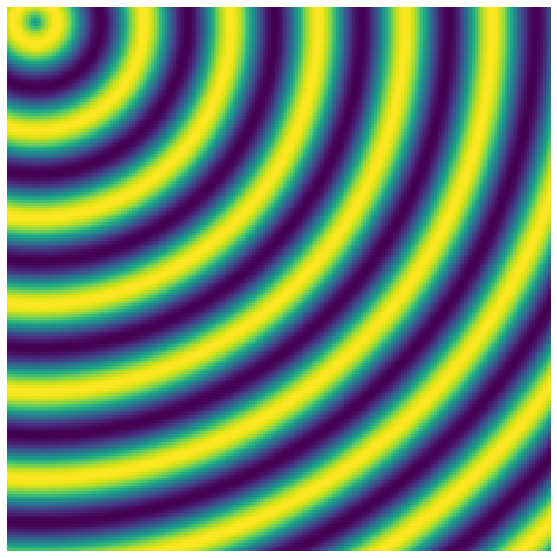

In [173]:
world = World(XDIM, YDIM, T)
world.add_oscillator(5, 10, amp=3, freq=1/32)
world.plot()

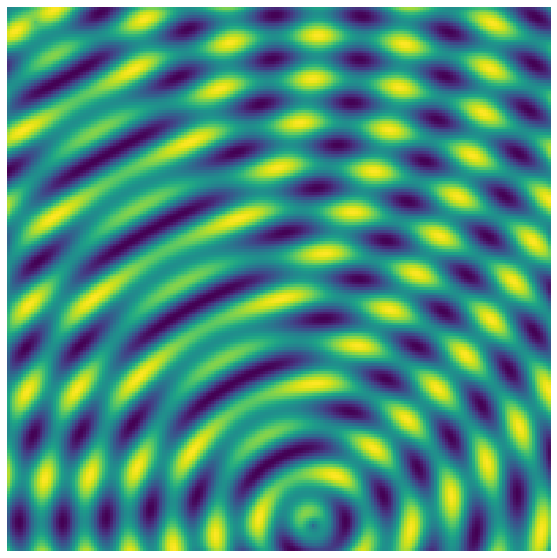

In [174]:
world.add_oscillator(190, 112, amp=3, freq=1/16)
world.plot()

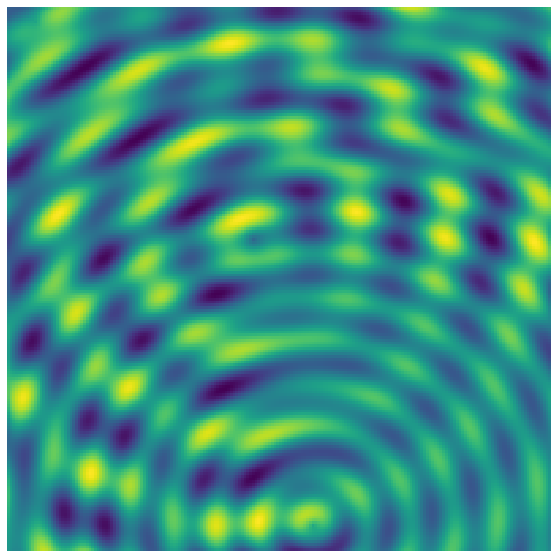

In [175]:
world.add_oscillator(85, 90, amp=5, freq=1/32)
world.plot()

In [23]:
XDIM, YDIM = 500, 500
A = 3
F = 1/64

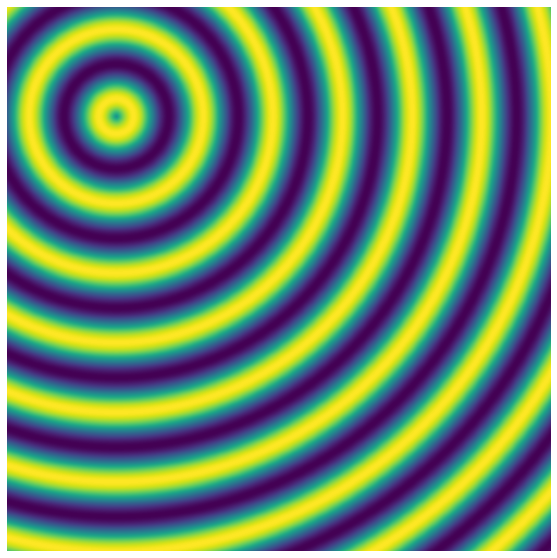

In [24]:
world = World(XDIM, YDIM, T)
world.add_oscillator(100, 100, amp=A, freq=F)
world.plot()

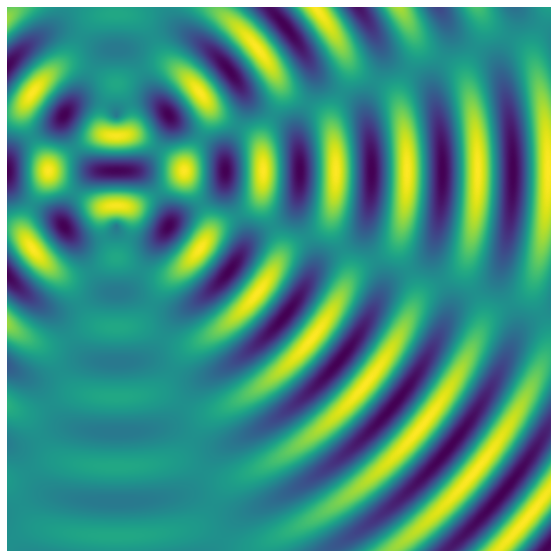

In [25]:
world.add_oscillator(200, 100, amp=A, freq=F)
world.plot()

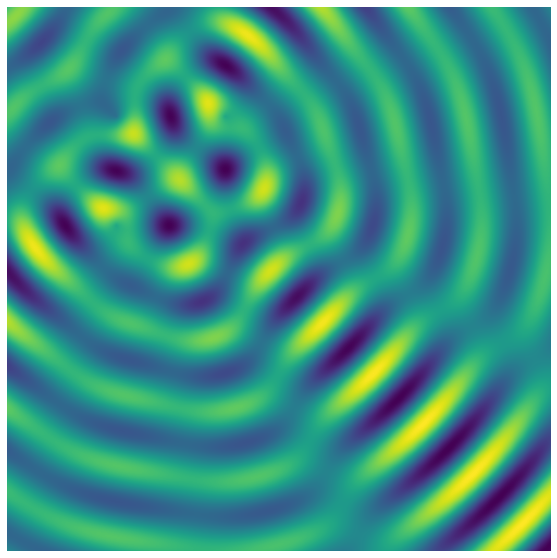

In [26]:
world.add_oscillator(100, 200, amp=A, freq=F)
world.plot()

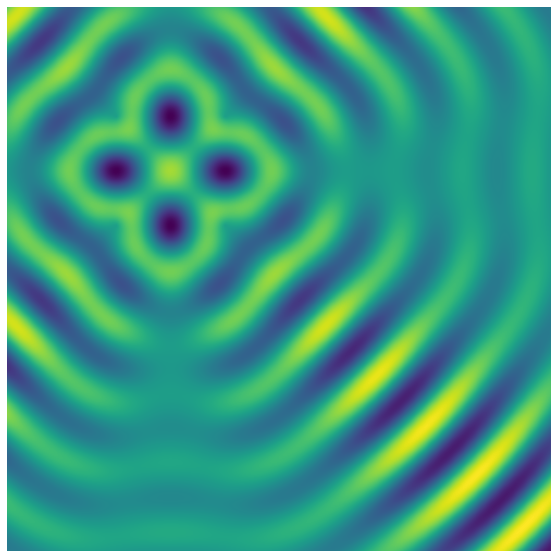

In [27]:
world.add_oscillator(200, 200, amp=A, freq=F)
world.plot()

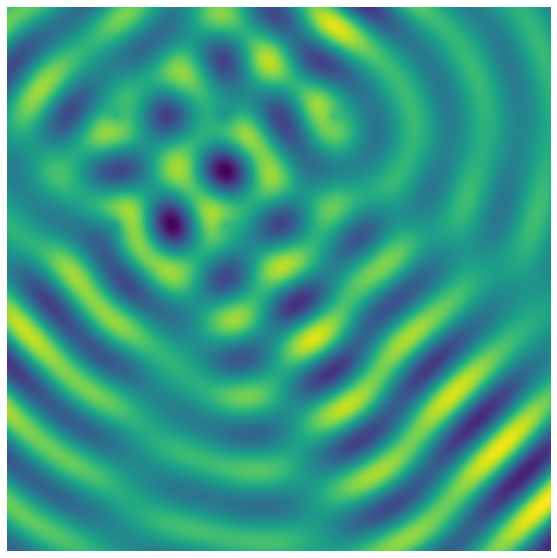

In [28]:
world.add_oscillator(100, 300, amp=A, freq=F)
world.plot()

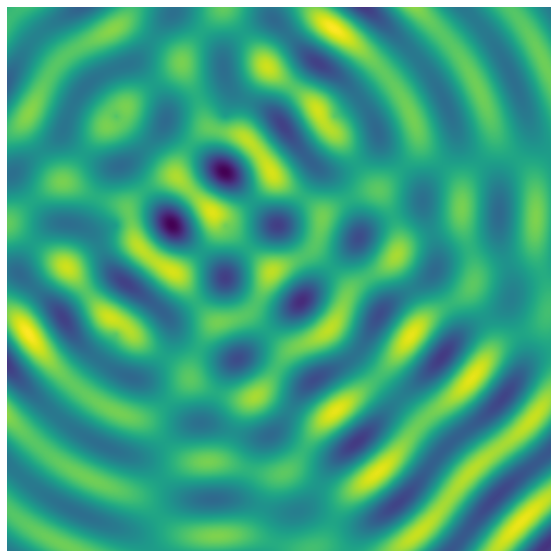

In [29]:
world.add_oscillator(300, 100, amp=A, freq=F)
world.plot()

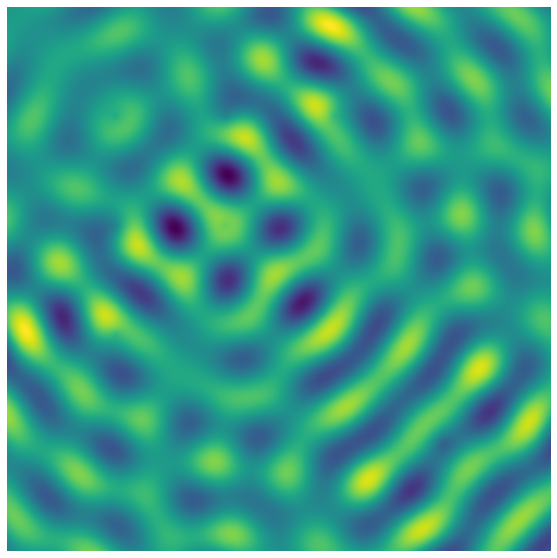

In [30]:
world.add_oscillator(400, 400, amp=A, freq=F)
world.plot()

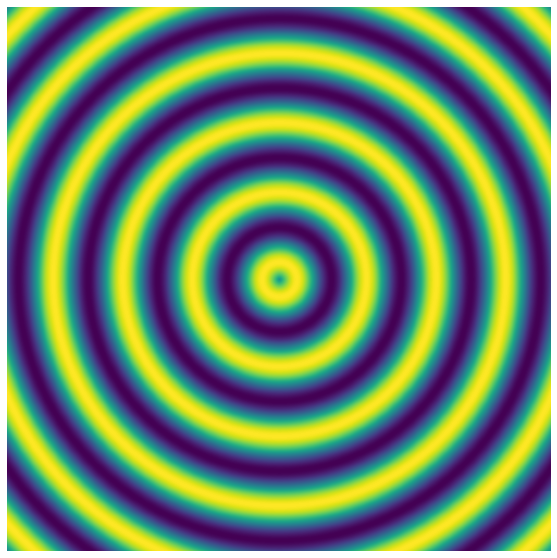

In [34]:
world = World(XDIM, YDIM, T)
world.add_oscillator(250, 250, amp=A, freq=F)
world.plot()

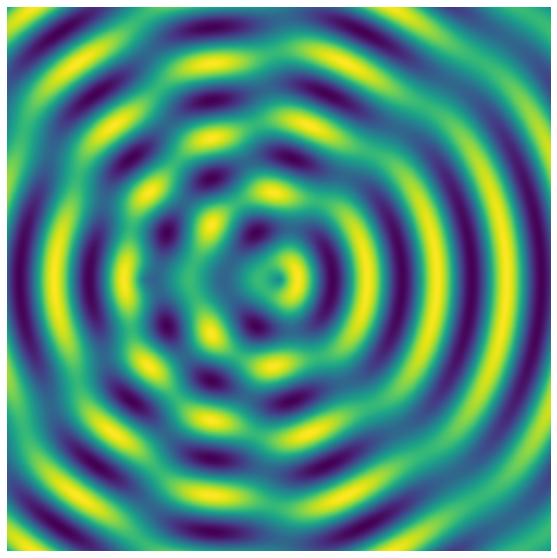

In [35]:
world.add_oscillator(250, 125, amp=A/2, freq=F)
world.plot()

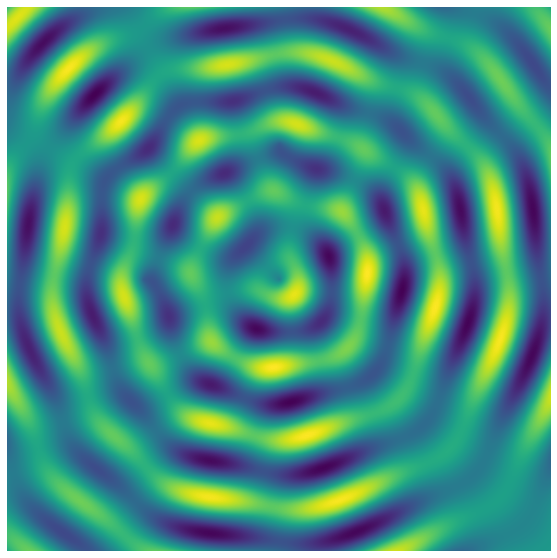

In [36]:
world.add_oscillator(125, 250, amp=A/2, freq=F)
world.plot()

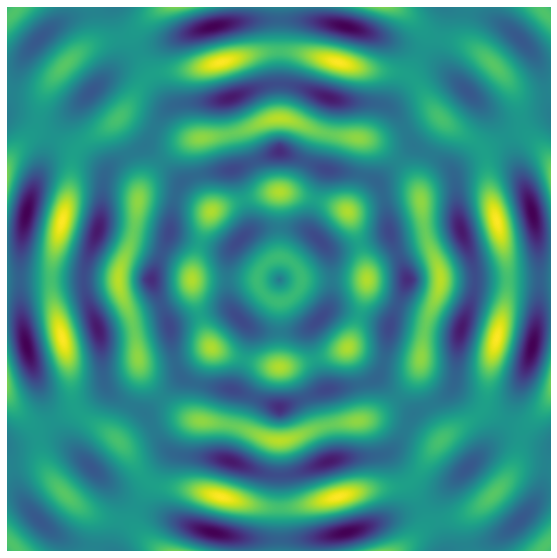

In [37]:
world.add_oscillator(375, 250, amp=A/2, freq=F)
world.add_oscillator(250, 375, amp=A/2, freq=F)
world.plot()

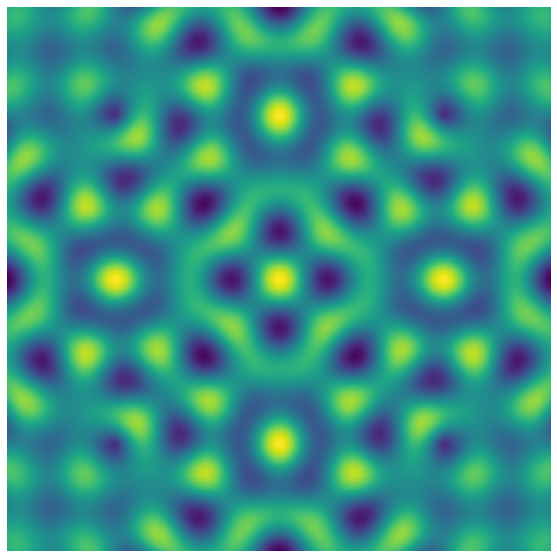

In [38]:
world = World(XDIM, YDIM, T)
world.add_oscillator(100, 100, amp=A, freq=F)
world.add_oscillator(100, 400, amp=A, freq=F)
world.add_oscillator(400, 100, amp=A, freq=F)
world.add_oscillator(400, 400, amp=A, freq=F)
world.plot()

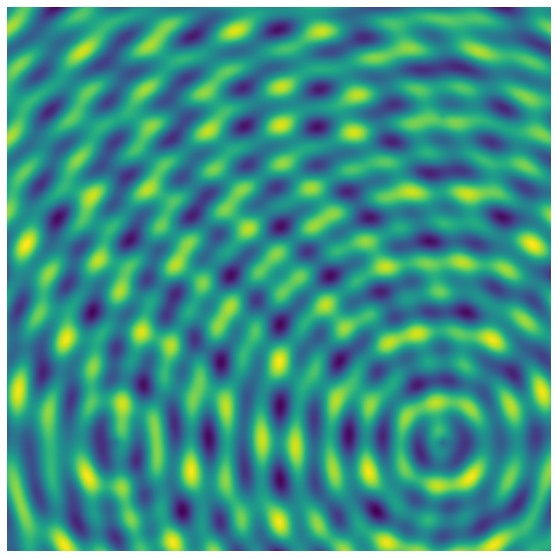

In [41]:
world = World(XDIM, YDIM, T)
world.add_oscillator(100, 100, amp=A, freq=F)
world.add_oscillator(100, 400, amp=2*A, freq=F)
world.add_oscillator(400, 100, amp=A, freq=2*F)
world.add_oscillator(400, 400, amp=2*A, freq=2*F)
world.plot()

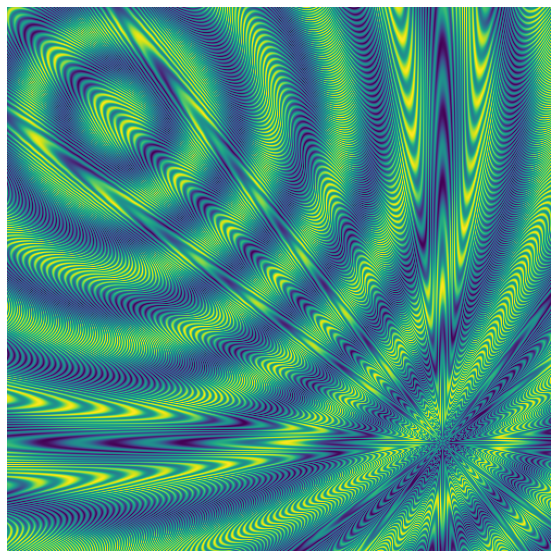

In [43]:
world = World(XDIM, YDIM, T)
world.add_oscillator(100, 100, amp=A, freq=F)
world.add_oscillator(400, 400, amp=A, freq=F+10)
world.plot()